# Resampling Temporal Data

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('HousePrices.csv')

df['date'] = pd.to_datetime(df['date'])
# you can also use parse_dates to convert a column to a date format
# df = pd.read_csv('HousePrices.csv', parse_dates=['date'])

In [14]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Index by date

- Note: `inplace=True` means that the changes are saved to the original dataframe

In [15]:
df.set_index(['date'], inplace=True)

Resample is like a group by but on temporal (time) data.

Here, we resample by **week** (7 days).

In [16]:
df.loc['2014-05-02']

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,,,,,,,,,,,,,,,,,
2014-05-02,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2014-05-02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2014-05-02,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2014-05-02,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
2014-05-02,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-02,6.250000e+05,4.0,3.25,2730,54014,1.0,0,0,3,1560,1170,2007,0,9927 174th Ave SE,Renton,WA 98059,USA
2014-05-02,3.000000e+05,3.0,2.50,2540,5050,2.0,0,0,3,2540,0,2006,0,29734 215th Terrace SE,Kent,WA 98042,USA
2014-05-02,4.361100e+05,3.0,2.50,1770,1235,3.0,0,0,3,1600,170,2007,0,1156 N 93rd St,Seattle,WA 98103,USA


<Axes: xlabel='date'>

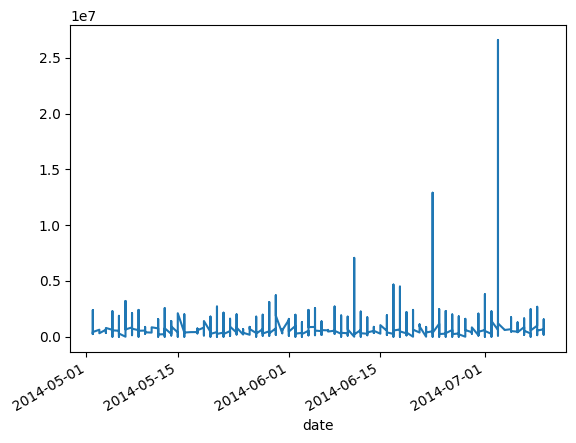

In [17]:
df['price'].plot()

In [18]:
df.resample('7D').mean(numeric_only=True)
# numeric_only=True must be set to avoid errors with non-numeric columns

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
date,,,,,,,,,,,,,
2014-05-02,537825.723593,3.405276,2.140887,2096.707434,17072.395683,1.496403,0.002398,0.182254,3.434053,1775.916067,320.791367,1970.261391,836.558753
2014-05-09,540494.078704,3.467626,2.170863,2183.350120,15969.129496,1.485612,0.011990,0.196643,3.450839,1855.702638,327.647482,1971.666667,812.517986
2014-05-16,503177.314835,3.336207,2.125539,2050.887931,15963.959052,1.529095,0.002155,0.288793,3.411638,1758.773707,292.114224,1972.181034,791.209052
2014-05-23,541481.000000,3.353383,2.107143,2105.150376,15311.749373,1.461153,0.005013,0.313283,3.461153,1781.298246,323.852130,1967.694236,845.551378
2014-05-30,541795.477375,3.364238,2.177152,2106.582781,13088.496689,1.477925,0.002208,0.187638,3.509934,1780.479029,326.103753,1971.088300,837.293598
2014-06-06,555203.456743,3.409692,2.153084,2151.022026,13420.107930,1.537445,0.008811,0.259912,3.469163,1833.041850,317.980176,1970.259912,812.138767
2014-06-13,565039.462662,3.466270,2.207341,2164.007937,14267.521825,1.538690,0.009921,0.240079,3.416667,1845.486111,318.521825,1972.309524,768.021825
2014-06-20,549246.205968,3.416283,2.153994,2142.708141,15602.843318,1.491551,0.012289,0.265745,3.465438,1834.858679,307.849462,1969.752688,881.737327
2014-06-27,625640.983564,3.380342,2.191239,2184.258547,12626.818376,1.558761,0.008547,0.262821,3.429487,1888.617521,295.641026,1971.000000,746.185897


<Axes: xlabel='date'>

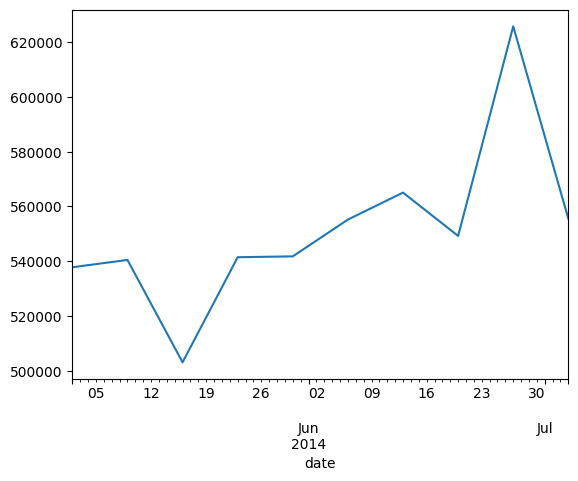

In [19]:
# plot the prices after resampling
df['price'].resample('7D').mean().plot()

Resampe by month:

<Axes: xlabel='date'>

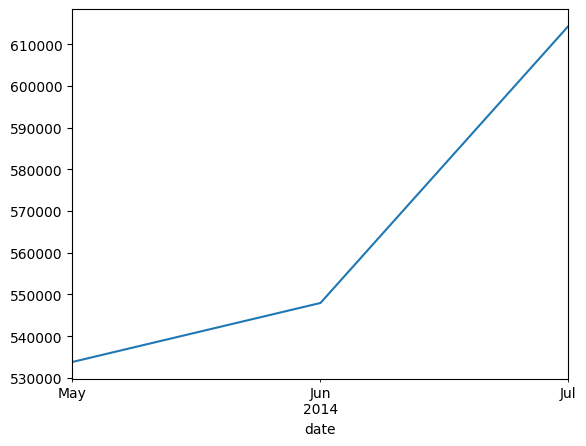

In [20]:
df['price'].resample('M').mean().plot()

Resample by year:

In [21]:
df.resample('Y').mean(numeric_only=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
date,,,,,,,,,,,,,
2014-12-31,551962.988473,3.40087,2.160815,2139.346957,14852.516087,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
